In [1]:
#toxic-comments.csv
# multilabel problem

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv('../datasets/toxic-comments.csv')

In [4]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [5]:
df.shape

(159571, 8)

In [6]:
df.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')

In [7]:
# define target variables
toxicities =[ 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate']

In [8]:
# try by groupby
comments = df.sum(numeric_only=True)

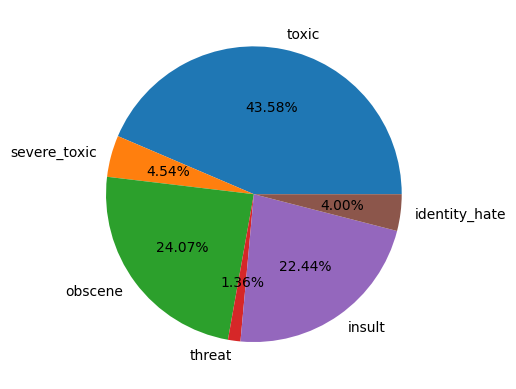

In [9]:
plt.pie(comments.values, labels = comments.index, autopct='%2.2f%%');

In [10]:
comment_type = df.sum(numeric_only=True, axis=1)
neutral_1 = comment_type[comment_type == 0]
neut_len = len(neutral_1)

In [11]:
toxic = comment_type[comment_type != 0]
tox_len = len(toxic)

In [12]:
newsr = pd.Series([neut_len, tox_len], index=['neutral', 'toxic'])
newsr

neutral    143346
toxic       16225
dtype: int64

<BarContainer object of 2 artists>

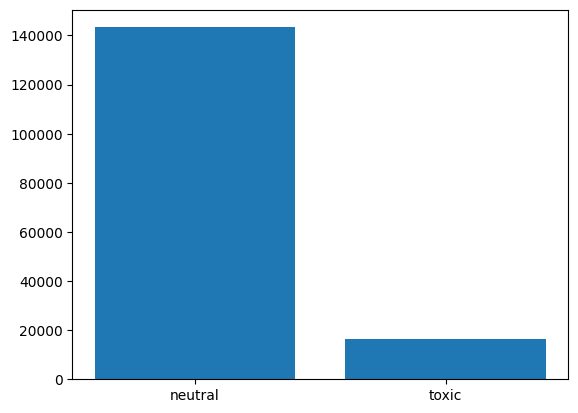

In [13]:
plt.bar(newsr.index, newsr.values)

<Axes: >

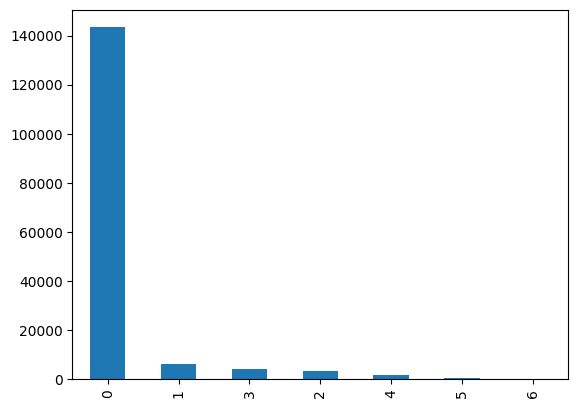

In [14]:
# comments in respective counts of category
comment_type.value_counts().plot(kind='bar')

<Axes: >

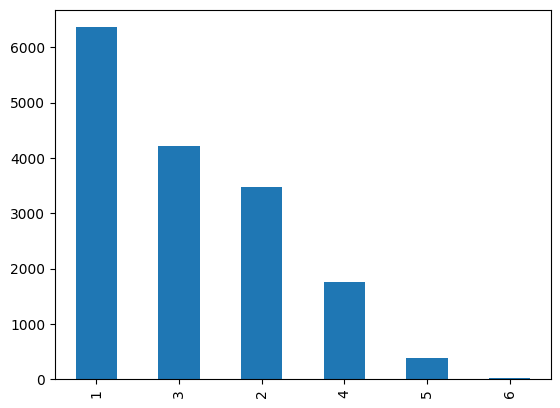

In [15]:
cnt = comment_type.value_counts()
only_neg = cnt[cnt.index!=0]
only_neg.plot(kind='bar')

## Data Cleaning

In [16]:
import re

In [17]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z0-9]+',' ',text)
    return text

In [18]:
text = 'Hello! How are you?'

In [19]:
clean_text(text)

'hello how are you '

In [20]:
comment_text = df['comment_text'].apply(clean_text)

In [21]:
comment_text

0         explanation why the edits made under my userna...
1         d aww he matches this background colour i m se...
2         hey man i m really not trying to edit war it s...
3          more i can t make any real suggestions on imp...
4         you sir are my hero any chance you remember wh...
                                ...                        
159566     and for the second time of asking when your v...
159567    you should be ashamed of yourself that is a ho...
159568    spitzer umm theres no actual article for prost...
159569    and it looks like it was actually you who put ...
159570     and i really don t think you understand i cam...
Name: comment_text, Length: 159571, dtype: object

In [22]:
labels = df[toxicities].to_numpy()
labels

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]], shape=(159571, 6))

Prepare the input data

In [23]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, GRU
from sklearn.model_selection import train_test_split

In [24]:
tokenizer = Tokenizer(num_words =5000)
tokenizer.fit_on_texts(comment_text)
sequences = tokenizer.texts_to_sequences(comment_text)
padded = pad_sequences(sequences, maxlen = 200, padding='post')

In [25]:
padded.shape

(159571, 200)

In [26]:
padded[0]

array([ 678,   77,    1,  130,  133,  181,   31,  668, 4472, 1088,   87,
        331,   49, 2224,   22,   54,   15,   62, 2738,  150,    3, 2924,
         36,  121, 1189, 2786,    5,   47,   60,   22,  245,    1,  361,
         33,    1,   38,   30,  146,    3,   70, 3359,   90, 3027, 4539,
       2252,  972,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

#### Cross validation

In [27]:
x_train, x_test, y_train, y_test = train_test_split(padded, labels, random_state=0, test_size=0.2)

In [28]:
x_train.shape, y_train.shape

((127656, 200), (127656, 6))

In [29]:
x_test.shape,y_test.shape

((31915, 200), (31915, 6))

Build the model

In [30]:
model = Sequential()

model.add(Embedding(5000, 100, input_length = 200))
model.add(GRU(64))
model.add(Dense(6,activation='sigmoid'))

C:\Users\dai\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [31]:
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

In [32]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru (GRU)                            │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

#### Train the model

In [33]:
model.fit(x_train,y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
3990/3990 ━━━━━━━━━━━━━━━━━━━━ 417s 104ms/step - accuracy: 0.9863 - loss: 0.0739 - val_accuracy: 0.9934 - val_loss: 0.0517
Epoch 2/5
3990/3990 ━━━━━━━━━━━━━━━━━━━━ 412s 103ms/step - accuracy: 0.9909 - loss: 0.0482 - val_accuracy: 0.9905 - val_loss: 0.0512
Epoch 3/5
3990/3990 ━━━━━━━━━━━━━━━━━━━━ 412s 103ms/step - accuracy: 0.9875 - loss: 0.0436 - val_accuracy: 0.9850 - val_loss: 0.0512
Epoch 4/5
3990/3990 ━━━━━━━━━━━━━━━━━━━━ 414s 104ms/step - accuracy: 0.9779 - loss: 0.0392 - val_accuracy: 0.9622 - val_loss: 0.0552
Epoch 5/5
3990/3990 ━━━━━━━━━━━━━━━━━━━━ 425s 107ms/step - accuracy: 0.9709 - loss: 0.0352 - val_accuracy: 0.9735 - val_loss: 0.0545


In [34]:
sample_text1 = 'i will kill you next time'
sample_text2 = 'you are stupid. No one cares about your opinion. Just shut up'
sample_text3 = 'you are awesome'
sample_text4 = 'Fuck you'

In [35]:
def predict(new_comment):
  cleaned = clean_text(new_comment)
  seq = tokenizer.texts_to_sequences([cleaned])
  new_pad = pad_sequences(seq, maxlen=200, padding='post')
  pred = model.predict(new_pad)
  return pred

In [36]:
pred_proba = predict(sample_text4)
pred_proba

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 510ms/step


array([[0.9987745 , 0.30977857, 0.99453896, 0.00161275, 0.79666114,
        0.02048663]], dtype=float32)

In [37]:
pred_labels = []
# pred_proba is a 2D array, even for a single prediction. We need the inner array.
# pred_proba[0] contains the probabilities for each toxicity label.
for i, prob in enumerate(pred_proba[0]):
  if prob > 0.5 :
      pred_labels.append(toxicities[i])

In [38]:
pred_labels

['toxic', 'obscene', 'insult']